In [16]:
import numpy as np
import matplotlib.pyplot as plt

### 1 Brownian motion 11pt

1. (2pt) By using the rescaled random walk, build a program which give one path of a Brownian motion on [0, 1] with a time subdivision t_i = \frac{i}{N} , 0 <= i <= N and give an example of the value taken by W1;

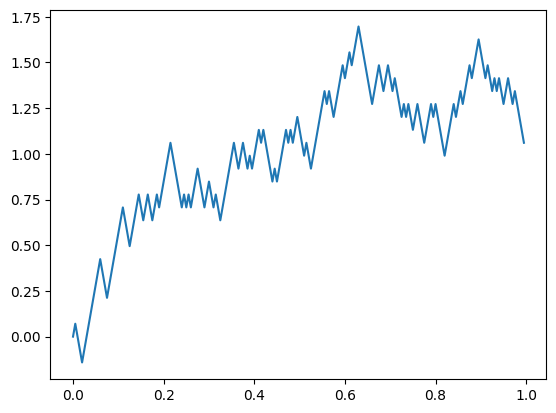

In [40]:
N = 200
np.random.seed(12345)

def walk(N):
    walks = np.random.rand(N)>0.5
    W = np.zeros(N+1)
    for i in range(len(walks)):
        if walks[i]: W[i+1] = W[i] + 1
        else: W[i+1] = W[i] - 1
    W = W/np.sqrt(N)
    x_axis = np.arange(0, 1, 1/200)
    np.append(x_axis, 1)
    return x_axis, W

x_axis, W = walk(N)
plt.plot(x_axis, W[:-1])

In [41]:
W[1]

0.07071067811865475

2. (3pt) Generate M path of a Brownian motion and prove numerically that E[Wt] = 0
and Var(Wt) = t for different values of t.

In [42]:
N = 200
M = 20000
np.random.seed(12345)

walks = []
for i in range(M):
    _, cur_W = walk(N)
    walks.append(cur_W[:-1])

walks = np.array(walks)

In [70]:
np.mean(walks[:, [i for i in range(0, 201, 6)]], axis=0)

array([ 0.00000000e+00, -9.47523087e-04, -4.59619408e-04,  9.82878426e-04,
        1.97989899e-03, -2.26274170e-04, -8.76812409e-04,  7.77817459e-05,
        9.54594155e-04,  1.13137085e-03,  4.05172186e-03,  4.25678282e-03,
        3.62745779e-03,  3.60624458e-03,  1.37885822e-03, -8.48528137e-05,
       -1.90918831e-04,  3.13248304e-03,  4.83661038e-03,  6.26496608e-03,
        8.96611399e-03,  9.97727668e-03,  9.19945922e-03,  7.83474314e-03,
        6.03869191e-03,  5.69928066e-03,  7.35391052e-03,  7.89838275e-03,
        8.86004797e-03,  7.40340800e-03,  8.88126117e-03,  8.25193614e-03,
        7.82060100e-03,  6.05283405e-03])

In [69]:
np.abs(np.var(walks[:, [i for i in range(10)]], axis=0) \
    - np.arange(0, 1, 1/200)[:10])

array([0.00000000e+00, 4.99999998e-11, 1.22775550e-04, 6.79992000e-05,
       1.13864800e-04, 3.37262000e-05, 1.01102200e-04, 2.26952200e-04,
       1.75065800e-04, 3.12000450e-04])